## Project Stage - IV (Dashboard)

## Goals

The final stage aims a developing a simple interactive dashboard based on the analysis you have done so far. In this we will be utilizing Plotly (https://plotly.com/) along with Dash (https://plotly.com/dash/) as our framework. 

Getting started with Dash: https://www.youtube.com/watch?v=hSPmj7mK6ng

*PS: This can be invoked from Jupyter, see here: https://medium.com/plotly/introducing-jupyterdash-811f1f57c02e*

### Tasks:

#### Task 1: (100 pts)
- Member:
    - Dashboard
        - **M1.1** Shows comparisions between a variable and Normalized Mortality rate in a scatter plot
            -- Incorporate your best model prediction trend line - Linear / Non-Linear. (20 pts)
            
        - **M1.2** Contains a data table (20 pts)
        - **M1.3** Contains a map displaying values of either variables (20 pts)
        - **M1.4** Selectors (30 pts)
            - Allows for linear or log mode selection on both the variables for scatter plot. 
            - Allows for selection of state.
            - Allows for linear or log mode selection on both the variables. 
            - Allows for selection of which variable to display on the map.
        
        - **M1.4** Selection of on the graph or Data Table highlights the other ones. (10 pts)
        
        - A partial example:
        
        <img src="../Dashboard1.png" width=800 height=800 />
     
***Extra Credit:*** Creative elements with the provided data and good design. Can earn upto 50 pts extra.

**Deliverable**
- Take screenshots of Report upload on canvas.
- Each member creates separate notebooks for member tasks. Upload all notebooks to Github Repository. 
- Final Presentation recordings on canvas.

In [1]:
pip install jupyter-dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 25.8 MB/s 
     |████████████████████████████████| 1.6 MB 2.0 MB/s 


In [2]:
pip install dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install dash_bootstrap_components

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 9.8 MB/s 


In [9]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
import dash_table as dt
import plotly.graph_objects as go
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
from dash.dependencies import Input, Output
import plotly.graph_objects as go
# Load Data
df = pd.read_csv('Merged_DataFrame.csv')
df['fips'] = [str(item).zfill(5) for item in df['FIPS']]
us_counties = pd.read_csv('uscounties.csv')
us_counties = us_counties[['county_fips', 'lat', 'lng']]
us_counties['fips'] = [str(item).zfill(5) for item in us_counties['county_fips']]
df = pd.merge(us_counties,df,on = 'fips')

app = JupyterDash(__name__)

app.layout = html.Div([

    # Flex container
    html.Div([
        # Graph container
        html.Div([
            dcc.Graph(id='graph1'),
            html.Label([
                "Independent_Variable",
            dcc.Dropdown(
                id='Independent Variable', clearable=False,
                value='Some college raw value', options= [item for item in df.columns if 'raw' in item] + ['Norm_Deaths'])
            ],),
            html.Label(["State",
            dcc.Dropdown(
                id='State', clearable=False,
                value='NC', options=list(df['State Abbreviation'].unique())) ],),
            dcc.RadioItems(id='x_axis', value='X Linear', options=['X Linear','X Log']),
            dcc.RadioItems(id='y_axis', value='Y Linear', options=['Y Linear','Y Log']),
            dcc.Graph(id='graph2'),], style={'width': '49%', 'padding': '0px 20px 20px 20px'}),

        # Table container
        html.Div(
            children=[
                html.Div(dcc.Graph(id='graph3')
                ),
                html.Div(
                    children=[
                        html.Div(html.H1("Data Table")),
                        html.Div(
                            children=[
                                html.Div(
                                    children=[html.Div(
                                            id="table-container",
                                            children=[dt.DataTable(columns=[{"name": i, "id": i} for i in df.columns],
                                            data = df.to_dict('records'),
                                            style_data={'whiteSpace': 'normal','height': 'auto',},fill_width=False ),],
                                        ),
                                    ],
                                    style={"display": "inline-block","width": 800,"height": 480,"margin": 5,},
                                ),  
                            ],
                            className="container",
                            style={
                                "align": "center",
                                "heigh": 475,
                                "textAlign": "center",
                                "border": "solid 0.05em",
                                "border-color": "lightgray",
                            },
                        ),  
                    ],
                    className="container",
                    style={"padding-top": 10, "padding-bottom": 50},
                ),  
            ]
        ),   
    ], style={'display': 'flex'}),
])


# Define callback to update graph
@app.callback(
    Output('graph1', 'figure'),
    Output('graph2', 'figure'),
    Output('graph3', 'figure'),
    Input("Independent Variable", "value"),
    Input("State", "value"), 
    Input('x_axis', 'value'),
    Input('y_axis', 'value'),
)

def update_figure(Independent_Variable,State,x_axis,y_axis):    
    #Q("Some college raw value")                  9.305841
    #Q("Primary care physicians raw value")    2516.532446
    #Q("Life expectancy raw value")              -0.074158
    #Q("Premature death raw value")               0.001117
    #Q("Unemployment raw value")                 35.279748
    # pred:
    XX = df[df['State Abbreviation'] == State][Independent_Variable]
    V1_ = df[df['State Abbreviation'] == State]["Some college raw value"]
    V2_ = df[df['State Abbreviation'] == State]["Primary care physicians raw value"]
    V3_ = df[df['State Abbreviation'] == State]["Life expectancy raw value"]
    V4_ = df[df['State Abbreviation'] == State]["Premature death raw value"]
    V5_ = df[df['State Abbreviation'] == State]["Unemployment raw value"]
    Pred = 9.305841*V1_ + 2516.532446*V2_ -0.074158*V3_ + 0.001117*V4_ + 35.279748*V5_
    if Independent_Variable == 'Norm_Deaths':
        new_df = pd.DataFrame({'Norm_Deaths_Observed': df[df['State Abbreviation'] == State]["Norm_Deaths"], 'Norm_Deaths_Predicted': Pred})
        fig1 = px.scatter(new_df,x = "Norm_Deaths_Predicted" , y = "Norm_Deaths_Observed", log_x = (x_axis == 'X Log'), log_y = (y_axis == 'Y Log'))
    else:
        fig1 = px.scatter(df[df['State Abbreviation'] == State], y="Norm_Deaths", x=Independent_Variable, log_x = (x_axis == 'X Log'), log_y = (y_axis == 'Y Log'))
    XX = df[df['State Abbreviation'] == State][Independent_Variable]
    V1 = df[df['State Abbreviation'] == State]["Some college raw value"].mean()
    V2 = df[df['State Abbreviation'] == State]["Primary care physicians raw value"].mean()
    V3 = df[df['State Abbreviation'] == State]["Life expectancy raw value"].mean()
    V4 = df[df['State Abbreviation'] == State]["Premature death raw value"].mean()
    V5 = df[df['State Abbreviation'] == State]["Unemployment raw value"].mean()
    if Independent_Variable == "Some college raw value":
        YY = 9.305841*XX + 2516.532446*V2 -0.074158*V3 + 0.001117*V4 + 35.279748*V5
        fig1.add_trace(go.Scatter(x=XX,y=YY,mode="lines",name="Selected Model",line=dict(color="black")))
        if x_axis == 'X Log':
            fig1.update_xaxes(type="log")
        if y_axis == 'Y Log':
            fig1.update_yaxes(type="log") 
    elif Independent_Variable == "Primary care physicians raw value":
        YY = 9.305841*V1 + 2516.532446*XX -0.074158*V3 + 0.001117*V4 + 35.279748*V5
        fig1.add_trace(go.Scatter(x=XX,y=YY,mode="lines",name="Selected Model",line=dict(color="black")))
        if x_axis == 'X Log':
            fig1.update_xaxes(type="log")
        if y_axis == 'Y Log':
            fig1.update_yaxes(type="log") 
    elif Independent_Variable == "Life expectancy raw value":
        YY = 9.305841*V1 + 2516.532446*V2 -0.074158*XX + 0.001117*V4 + 35.279748*V5
        fig1.add_trace(go.Scatter(x=XX,y=YY,mode="lines",name="Selected Model",line=dict(color="black")))
        if x_axis == 'X Log':
            fig1.update_xaxes(type="log")
        if y_axis == 'Y Log':
            fig1.update_yaxes(type="log") 
    elif Independent_Variable == "Premature death raw value":
        YY = 9.305841*V1 + 2516.532446*V2 -0.074158*V3 + 0.001117*XX + 35.279748*V5
        fig1.add_trace(go.Scatter(x=XX,y=YY,mode="lines",name="Selected Model",line=dict(color="black")))
        if x_axis == 'X Log':
            fig1.update_xaxes(type="log")
        if y_axis == 'Y Log':
            fig1.update_yaxes(type="log") 
    elif Independent_Variable == "Unemployment raw value":
        YY = 9.305841*V1 + 2516.532446*V2 -0.074158*V3 + 0.001117*V4 + 35.279748*XX
        fig1.add_trace(go.Scatter(x=XX,y=YY,mode="lines",name="Selected Model",line=dict(color="black")))
        if x_axis == 'X Log':
            fig1.update_xaxes(type="log")
        if y_axis == 'Y Log':
            fig1.update_yaxes(type="log") 
    elif Independent_Variable == "Norm_Deaths":
        'a'
    else:
        YY = 9.305841*V1 + 2516.532446*V2 -0.074158*V3 + 0.001117*V4 + 35.279748*V5
        fig1.add_trace(go.Scatter(x=XX,y=[YY]*len(XX),mode="lines",name="Selected Model",line=dict(color="black")))
        if x_axis == 'X Log':
            fig1.update_xaxes(type="log")
        if y_axis == 'Y Log':
            fig1.update_yaxes(type="log") 
    
    fig2 = px.scatter_geo(df[df['State Abbreviation'] == State], lat ="lat" , lon ="lng" , color=Independent_Variable,
                           opacity=0.5,height = 360,scope = 'usa',hover_name = 'County',projection = 'albers usa',title = State + ' Counties ' + ' ' + Independent_Variable + ' Map')
    fig2.update_layout(
    autosize=True,
    height=360,
    geo=dict(
        center=dict({'lat': df[df['State Abbreviation'] == State]['lat'].mean() , 'lon' :df[df['State Abbreviation'] == State]['lng'].mean()}),
        scope='usa',
        projection_scale=5)
    )
    
    fig3 = px.scatter_geo(df[df['State Abbreviation'] == State], lat ="lat" , lon ="lng" , color='Norm_Deaths',
                           opacity=0.5,height = 360,scope = 'usa',hover_name = 'County',projection = 'albers usa',title = State + ' Counties ' + 'Norm_Deaths Map')
    fig3.update_layout(
    autosize=True,
    height=360,
    geo=dict(
        center=dict({'lat': df[df['State Abbreviation'] == State]['lat'].mean() , 'lon' :df[df['State Abbreviation'] == State]['lng'].mean()}),
        scope='usa',
        projection_scale=5)
    )

    return fig2,fig1,fig3


@app.callback(
    Output("table-container", "children"),
    Input("State", "value")
)

def update_figure(State):
    dff = df[df['State Abbreviation'] == State] [['County' , 'Norm_Deaths'] + [item for item in df.columns if 'raw' in item] ]

    return html.Div(
        [
            dt.DataTable(
                id="table",
                columns=[{"id": name, "name": name} for name in dff.columns.values],
                data=dff.to_dict("records"),
                filter_action='native',
                style_table={'height': 480, 'overflowX': 'auto'}
            )
        ]
    )
    
# Run app and display result inline in the notebook
app.run_server(mode='inline')

#app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [8]:
app.run_server(mode='inline')

<IPython.core.display.Javascript object>

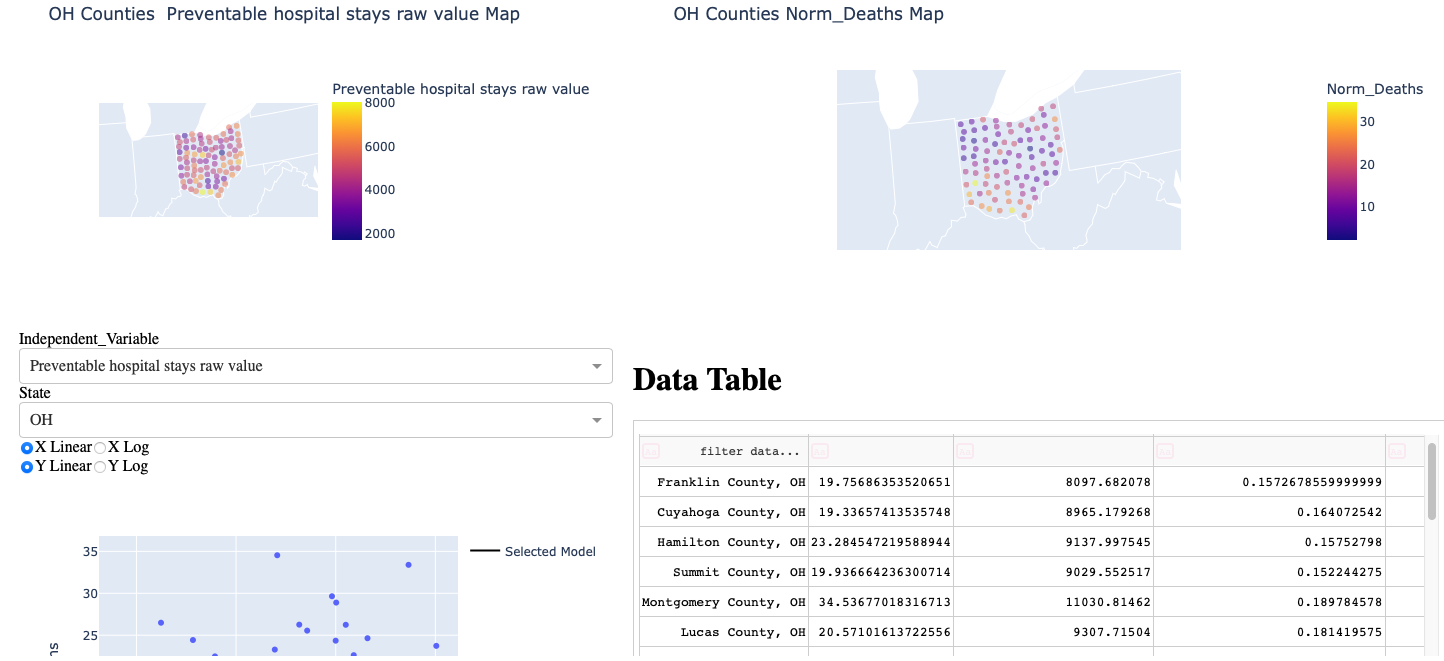

In [11]:
from IPython.display import Image
Image("screenshots/1.png")

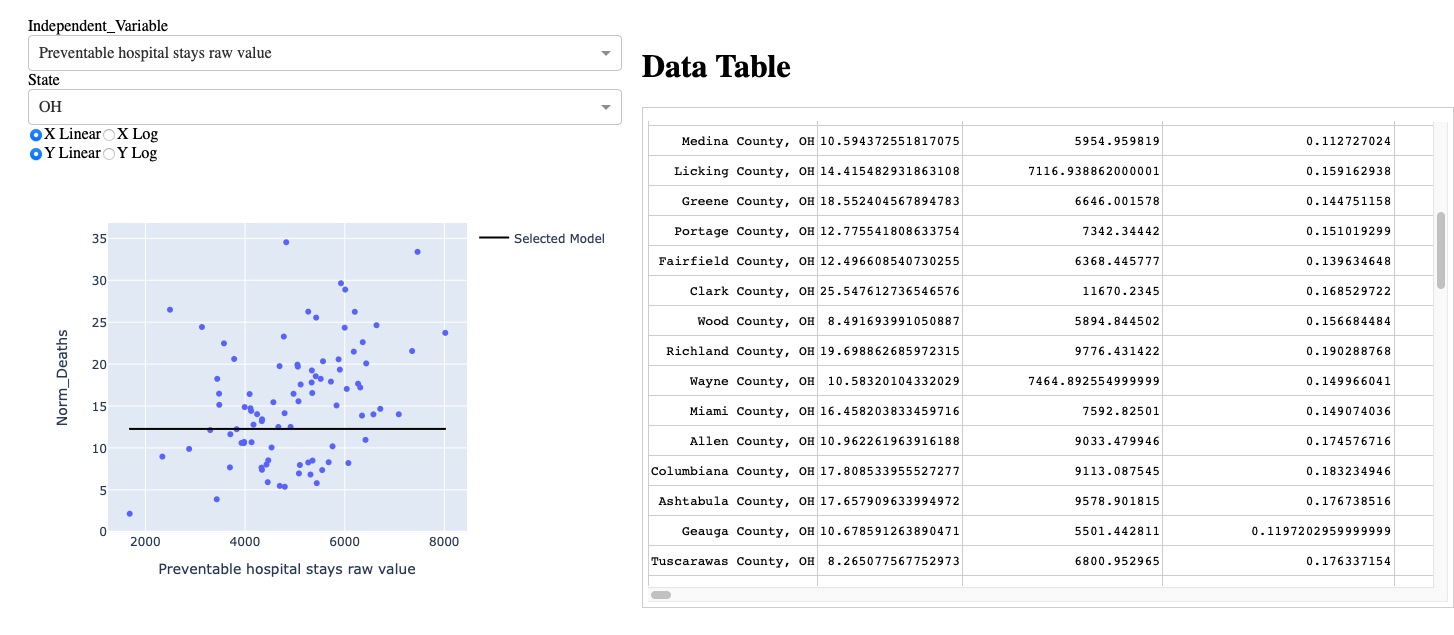

In [12]:
from IPython.display import Image
Image("screenshots/2.png")